# Heart Disease Identification
Binary classification problem for identifying cases of heart disease in patients. Within this exercise we will demonstrate the use of different feature selection methods, as well as compare the performance of a tuned Logistic Regression model against a more advanced Gradient Boosted Machine model on a small sample set.

Even with the use of cross-validation we can find that a well-tuned Logit model can perform just as well as a more advanced GBM model on small sample sizes.

The data for this example can be found in the following Kaggle link; https://www.kaggle.com/ronitf/heart-disease-uci/version/1#

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

# import statsmodels.formula.api as sm
%matplotlib inline

In [4]:
heart_df = pd.read_csv("heart.csv")

### Check for Missing Data

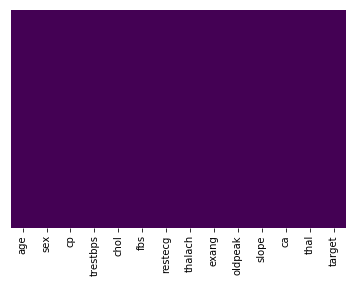

In [554]:
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Check for class imbalance
Here we see that our binary response variable is not imbalanced

In [555]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Preprocessing

### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas. Otherwise the logistic regression model won't be able to directly take in those features as inputs.

In [556]:
heart_df = pd.get_dummies(heart_df, columns=['target','sex','fbs','exang','cp','restecg'], drop_first=True)


### Split Data into Training and Testing Sets 

In [557]:
X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('target_1',axis=1), 
                                                    heart_df['target_1'], test_size=0.30, 
                                                    random_state=101)

### Scale Data

In [558]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [559]:
X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, index=X_test.index, columns = X_test.columns)

# Feature Selection
We will use Backward Elimination, ANOVA, Recursive Feature Elimination (RFE), and Select From Model (SFM)

### Backward Elimination
We running backward elimination we found the following predictor variables to have a statistically significant relationship to our response variable (p > 0.05).
* oldpeak	
* ca	
* thal	
* sex_1
* exang_1	
* cp_1	
* cp_2	
* cp_3

In [560]:
X_train_sc['constant'] = 1
X_train_sc = X_train_sc[['constant','age', 'trestbps','chol','thalach','oldpeak','slope','ca','thal','sex_1','fbs_1','exang_1','cp_1','cp_2','cp_3','restecg_1','restecg_2']]

X_train_opt = X_train_sc.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8,9,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 4, 5, 6, 7, 8,9,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 2, 5, 6, 7, 8,9,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 5, 6, 7, 8,9,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()

X_train_opt = X_train_sc.iloc[:,[0, 5, 7, 8,9,11,12,13,14]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               target_1   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     23.77
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.56e-25
Time:                        12:11:28   Log-Likelihood:                -82.423
No. Observations:                 212   AIC:                             182.8
Df Residuals:                     203   BIC:                             213.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.5566      0.025     22.217      0.000       0.507       0.606
oldpeak       -0.1057      0.028     -3.779      0.000      -0.161      -0.051
ca            -0.0955      0.027     -3.574      0.000      -0.148      -0.043
thal          -0.0793      0.026     -3.016      0.003      -0.131      -0.027
sex_1         -0.0657      0.026     -2.528      0.012      -0.117      -0.014
exang_1       -0.0714      0.028     -2.506      0.013      -0.128      -0.015
cp_1           0.1036      0.030      3.484      0.001       0.045       0.162
cp_2           0.1698      0.030      5.723      0.000       0.111       0.228
cp_3           0.0775      0.027      2.839      0.005       0.024       0.131
==============================================================================
Omnibus:                        3.745   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.788
Skew:                          -0.320   Prob(JB):                        0.150
Kurtosis:                       2.864   Cond. No.                         2.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reduce training and testing data sets to only relevant fields 

In [561]:
X_test_sc['constant'] = 1
X_test_sc = X_test_sc[['constant','age', 'trestbps','chol','thalach','oldpeak','slope','ca','thal','sex_1','fbs_1','exang_1','cp_1','cp_2','cp_3','restecg_1','restecg_2']]
X_test_opt = X_test_sc.iloc[:, [0, 5, 7, 8,9,11,12,13,14]]

Measure results on from test set using fields identified from Backward Elimination process 

In [562]:
# Fitting Logistic Regression to the opt Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_opt, y_train)

# predicting the test set result
y_pred_logreg_be = classifier.predict(X_test_opt)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logreg_be = confusion_matrix(y_test, y_pred_logreg_be)

print(cm_logreg_be)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[35  9]
 [ 6 41]]


View the precision, recall, and F1 scores when using our test data

In [564]:
precision_recall_fscore_support(y_test, y_pred_logreg_be, average="binary")

(0.82, 0.8723404255319149, 0.8453608247422681, None)

View coefficient values

In [565]:
pd.concat([pd.DataFrame(X_test_opt.columns),pd.DataFrame(np.transpose(classifier.coef_))], axis = 1)


,0,0
0,constant,0.123317
1,oldpeak,-0.830286
2,ca,-0.680969
3,thal,-0.537372
4,sex_1,-0.465986
5,exang_1,-0.483228
6,cp_1,0.460451
7,cp_2,1.053924
8,cp_3,0.464026


### ANOVA
From this exercise we are able to identify the following variables that contain a P value < 0.05. This approach gives us very similar values to use when compared to the Backward Elimination process. However, ANOVA did not perform as well as the Backward Elimination process.
* ca
* thal
* sex_1
* exang_1
* cp_1
* cp_2
* cp_3

In [566]:
model_df = X_train_sc.copy()
model_df['target'] = y_train.values

In [567]:
results = ols('target ~ age + trestbps + chol + thalach + oldpeak + slope + ca + thal + sex_1 + fbs_1 + exang_1 + cp_1 + cp_2 + cp_3 + restecg_1 + restecg_2', data = model_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           4.74e-23
Time:                        12:12:28   Log-Likelihood:                -75.695
No. Observations:                 212   AIC:                             185.4
Df Residuals:                     195   BIC:                             242.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5566      0.025     22.477      0.000       0.508       0.605
age           -0.0238      0.030     -0.786      0.433      -0.084       0.036
trestbps      -0.0360      0.028     -1.298      0.196      -0.091       0.019
chol          -0.0244      0.027     -0.907      0.366      -0.077       0.029
thalach        0.0401      0.032      1.267      0.207      -0.022       0.102
oldpeak       -0.0536      0.035     -1.525      0.129      -0.123       0.016
slope          0.0490      0.034      1.436      0.153      -0.018       0.116
ca            -0.0918      0.028     -3.319      0.001      -0.146      -0.037
thal          -0.0782      0.027     -2.944      0.004      -0.130      -0.026
sex_1         -0.0867      0.027     -3.226      0.001      -0.140      -0.034
fbs_1          0.0267      0.026      1.026      0.306      -0.025       0.078
exang_1       -0.0594      0.029     -2.049      0.042      -0.117      -0.002
cp_1           0.0871      0.030      2.892      0.004       0.028       0.147
cp_2           0.1491      0.030      4.903      0.000       0.089       0.209
cp_3           0.0738      0.028      2.648      0.009       0.019       0.129
restecg_1      0.0259      0.026      0.986      0.326      -0.026       0.078
restecg_2     -0.0067      0.026     -0.257      0.797      -0.058       0.045
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.428
Skew:                          -0.170   Prob(JB):                        0.490
Kurtosis:                       2.786   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [568]:
# Fitting Logistic Regression to the opt Training set
X_train_opt = X_train_sc[['ca','thal','sex_1','exang_1','cp_1','cp_2','cp_3']].copy()
X_test_opt = X_test_sc[['ca','thal','sex_1','exang_1','cp_1','cp_2','cp_3']].copy()

# from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_opt, y_train)

# predicting the test set result
y_pred_logreg_anova = classifier.predict(X_test_opt)

# Making the Confusion Matrix
cm_logreg_anova = confusion_matrix(y_test, y_pred_logreg_anova)

print(cm_logreg_anova)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[34 10]
 [ 6 41]]


View the precision, recall, and F1 scores when using our test data

In [569]:
precision_recall_fscore_support(y_test, y_pred_logreg_anova, average="binary")

(0.803921568627451, 0.8723404255319149, 0.8367346938775511, None)

## Recursive Feature Selection
We can see that the results from using RFE for feature selection do not perform as well as Backward Elimination as RFE requires us to select the desired number of features before modeling. The following predictor variables were identified using the RFS approach.
* oldpeak
* ca
* thal
* exang_1
* cp_2

In [570]:
logreg = LogisticRegression(fit_intercept=False)
rfe = RFE(logreg, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train_sc, y_train)

feature_index = rfe.get_support(True)
order = rfe.ranking_


/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

In [571]:
X_train_sc.columns[feature_index]

Index(['oldpeak', 'ca', 'thal', 'exang_1', 'cp_2'], dtype='object')

In [572]:
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train_sc.columns))

[(1, 'ca'),
 (1, 'cp_2'),
 (1, 'exang_1'),
 (1, 'oldpeak'),
 (1, 'thal'),
 (2, 'cp_1'),
 (3, 'cp_3'),
 (4, 'sex_1'),
 (5, 'thalach'),
 (6, 'trestbps'),
 (7, 'slope'),
 (8, 'chol'),
 (9, 'constant'),
 (10, 'restecg_1'),
 (11, 'fbs_1'),
 (12, 'age'),
 (13, 'restecg_2')]

In [573]:
X_test_sc.iloc[:,feature_index].head()

,oldpeak,ca,thal,exang_1,cp_2
221,3.892820,-0.713946,1.160793,1.471115,-0.642910
8,-0.440462,-0.713946,1.160793,-0.679757,1.555428
89,-0.015631,-0.713946,-0.501965,-0.679757,-0.642910
154,-0.865294,-0.713946,-0.501965,-0.679757,1.555428
201,1.513763,0.256288,1.160793,1.471115,-0.642910


In [575]:
# Fitting Logistic Regression to the opt Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
X_train_opt = X_train_sc.iloc[:,feature_index]
classifier.fit(X_train_opt, y_train)

# predicting the test set result
X_test_opt = X_test_sc.iloc[:,feature_index]
y_pred_logreg_rfe = classifier.predict(X_test_opt)

# Making the Confusion Matrix
cm_logreg_rfe = confusion_matrix(y_test, y_pred_logreg_rfe)

print(cm_logreg_rfe)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[32 12]
 [ 7 40]]


In [577]:
precision_recall_fscore_support(y_test, y_pred_logreg_rfe, average="binary")

(0.7692307692307693, 0.851063829787234, 0.8080808080808081, None)

### Select From Model
While Backward Elimination performed quite well earlier in our process, the SFM approach slightly outperformed the BE approach. The following predictor variables were identified using the SFM approach.
* constant
* trestbps
* thalach
* oldpeak* slope
* ca
* thal
* sex_1
* fbs_1
* exang_1
* cp_1
* cp_2
* cp_3'

In [579]:
smf = SelectFromModel(logreg, threshold = 0.05, max_features=13)
smf.fit(X_train_sc, y_train)
feature_idx = smf.get_support()
feature_name = X_train_sc.columns[feature_idx]
feature_name


/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['constant', 'trestbps', 'thalach', 'oldpeak', 'slope', 'ca', 'thal',
       'sex_1', 'fbs_1', 'exang_1', 'cp_1', 'cp_2', 'cp_3'],
      dtype='object')

In [580]:
# Fitting Logistic Regression to the opt Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
X_train_opt = X_train_sc.iloc[:,feature_idx]
classifier.fit(X_train_opt, y_train)

# predicting the test set result
X_test_opt = X_test_sc.iloc[:,feature_idx]
y_pred_logreg_sfm = classifier.predict(X_test_opt)

# Making the Confusion Matrix
cm_logreg_sfm = confusion_matrix(y_test, y_pred_logreg_sfm)

print(cm_logreg_sfm)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[36  8]
 [ 5 42]]


In [581]:
precision_recall_fscore_support(y_test, y_pred_logreg_sfm, average="binary")

(0.84, 0.8936170212765957, 0.8659793814432989, None)

### Compare logit performance across all feature selection techniques
Precision, Recall, F1 Score

Backward Elimination

In [582]:
precision_recall_fscore_support(y_test, y_pred_logreg_be, average="binary")

(0.82, 0.8723404255319149, 0.8453608247422681, None)

ANOVA

In [583]:
precision_recall_fscore_support(y_test, y_pred_logreg_anova, average="binary")

(0.803921568627451, 0.8723404255319149, 0.8367346938775511, None)

Recursive Feature Selection

In [584]:
precision_recall_fscore_support(y_test, y_pred_logreg_rfe, average="binary")

(0.7692307692307693, 0.851063829787234, 0.8080808080808081, None)

Select From Model

In [585]:
precision_recall_fscore_support(y_test, y_pred_logreg_sfm, average="binary")

(0.84, 0.8936170212765957, 0.8659793814432989, None)

### Create Logistic Regression
Create logistic regression model using the variables identified using the Select From Model approach

In [395]:
import statsmodels.formula.api as smf

In [409]:
model_df = X_train_sc.copy()
model_df['target'] = y_train.values

model = smf.logit(formula="target ~ trestbps + thalach + oldpeak + slope + ca + thal + sex_1 + fbs_1 + exang_1 + cp_1 + cp_2 + cp_3", data= model_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.360475
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Wed, 18 Mar 2020   Pseudo R-squ.:                  0.4751
Time:                        18:34:43   Log-Likelihood:                -76.421
converged:                       True   LL-Null:                       -145.59
                                        LLR p-value:                 1.301e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2982      0.215      1.385      0.166      -0.124       0.720
trestbps      -0.4288      0.209     -2.053      0.040      -0.838      -0.019
thalach        0.3187      0.246      1.295      0.195      -0.164       0.801
oldpeak       -0.5515      0.308     -1.793      0.073      -1.154       0.051
slope          0.4119      0.299      1.379      0.168      -0.174       0.997
ca            -0.7651      0.223     -3.424      0.001      -1.203      -0.327
thal          -0.5755      0.204     -2.815      0.005      -0.976      -0.175
sex_1         -0.6724      0.244     -2.756      0.006      -1.151      -0.194
fbs_1          0.2004      0.231      0.866      0.386      -0.253       0.654
exang_1       -0.3910      0.227     -1.724      0.085      -0.836       0.053
cp_1           0.4276      0.229      1.866      0.062      -0.022       0.877
cp_2           1.1344      0.256      4.437      0.000       0.633       1.636
cp_3           0.5386      0.199      2.709      0.007       0.149       0.928
==============================================================================
"""

## Gradient Boosted Machine 
Now that we have identified the performance of logistic regression models with various feature selection approaches we are going to compare that performance to that of a tree-based forward learning ensemble model. 

Just like with the logistic regression models we are going to try and optimize the model to account for our relatively small data set (for GBM models). We will run a grid search to identify the optimal hyperparameters and predictor variables to use in the model. 

We will then compare the performance of our best performing GBM and Logistic Regression models. 

In [586]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_211"; Java(TM) SE Runtime Environment (build 1.8.0_211-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from /Users/carsonransford/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/9w/d96qt62n1ng_k1j1k7f7231m0000gp/T/tmp5cprmvui
  JVM stdout: /var/folders/9w/d96qt62n1ng_k1j1k7f7231m0000gp/T/tmp5cprmvui/h2o_carsonransford_started_from_python.out
  JVM stderr: /var/folders/9w/d96qt62n1ng_k1j1k7f7231m0000gp/T/tmp5cprmvui/h2o_carsonransford_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 13 days
H2O cluster name:,H2O_from_python_carsonransford_96ej56
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [587]:
df = h2o.H2OFrame(heart_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [588]:
response = "target_1"

In [589]:
df.head()

age,trestbps,chol,thalach,oldpeak,slope,ca,thal,target_1,sex_1,fbs_1,exang_1,cp_1,cp_2,cp_3,restecg_1,restecg_2
63,145,233,150,2.3,0,0,1,1,1,1,0,0,0,1,0,0
37,130,250,187,3.5,0,0,2,1,1,0,0,0,1,0,1,0
41,130,204,172,1.4,2,0,2,1,0,0,0,1,0,0,0,0
56,120,236,178,0.8,2,0,2,1,1,0,0,1,0,0,1,0
57,120,354,163,0.6,2,0,2,1,0,0,1,0,0,0,1,0
57,140,192,148,0.4,1,0,1,1,1,0,0,0,0,0,1,0
56,140,294,153,1.3,1,0,2,1,0,0,0,1,0,0,0,0
44,120,263,173,0,2,0,3,1,1,0,0,1,0,0,1,0
52,172,199,162,0.5,2,0,3,1,1,1,0,0,1,0,1,0
57,150,168,174,1.6,2,0,2,1,1,0,0,0,1,0,1,0


In [590]:
df[response] = df[response].asfactor()

In [591]:
predictors = df.drop(['target_1'], axis = 1).columns
# del predictors[-1]
print(predictors)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'sex_1', 'fbs_1', 'exang_1', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2']


### Train, Validation, Testing Approach
We are going to first try training our GBM model using training and validation data sets instead of using cross validation. Due to the small sample size of this data set we will most likely get better results using corss validation, but let's compare the performance of this model to another GBM we will make later on which is trained using cross validation.

In [592]:
train, valid, test = df.split_frame(
    ratios=[0.6,0.2], 
    seed=101, 
    destination_frames=['train.hex','valid.hex','test.hex']
)

Train basic GBM model with default values

In [593]:
#We only provide the required parameters, everything else is default
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response
          , training_frame=train
          , validation_frame = valid)

## Show a detailed model summary
print(gbm)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1584634725492_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,10807.0,5.0,5.0,5.0,8.0,15.0,12.54




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.015952584632008802
RMSE: 0.12630354164475674
LogLoss: 0.09939418398039385
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 0.9903846153846153
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6317179932170792: 


,,0,1,Error,Rate
0,0,84.0,0.0,0.0,(0.0/84.0)
1,1,0.0,104.0,0.0,(0.0/104.0)
2,Total,84.0,104.0,0.0,(0.0/188.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.631718,1.000000,102.0
1,max f2,0.631718,1.000000,102.0
2,max f0point5,0.631718,1.000000,102.0
3,max accuracy,0.631718,1.000000,102.0
4,max precision,0.992707,1.000000,0.0
5,max recall,0.631718,1.000000,102.0
6,max specificity,0.992707,1.000000,0.0
7,max absolute_mcc,0.631718,1.000000,102.0
8,max min_per_class_accuracy,0.631718,1.000000,102.0
9,max mean_per_class_accuracy,0.631718,1.000000,102.0



Gains/Lift Table: Avg response rate: 55.32 %, avg score: 55.31 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010638,0.991542,1.807692,1.807692,1.000000,0.992504,1.000000,0.992504,0.019231,0.019231,80.769231,80.769231
1,,2,0.021277,0.991380,1.807692,1.807692,1.000000,0.991411,1.000000,0.991958,0.019231,0.038462,80.769231,80.769231
2,,3,0.031915,0.990672,1.807692,1.807692,1.000000,0.991210,1.000000,0.991708,0.019231,0.057692,80.769231,80.769231
3,,4,0.042553,0.990364,1.807692,1.807692,1.000000,0.990414,1.000000,0.991385,0.019231,0.076923,80.769231,80.769231
4,,5,0.053191,0.989046,1.807692,1.807692,1.000000,0.989799,1.000000,0.991068,0.019231,0.096154,80.769231,80.769231
5,,6,0.101064,0.982133,1.807692,1.807692,1.000000,0.986413,1.000000,0.988863,0.086538,0.182692,80.769231,80.769231
6,,7,0.154255,0.977956,1.807692,1.807692,1.000000,0.979902,1.000000,0.985773,0.096154,0.278846,80.769231,80.769231
7,,8,0.202128,0.972956,1.807692,1.807692,1.000000,0.975804,1.000000,0.983412,0.086538,0.365385,80.769231,80.769231
8,,9,0.303191,0.939637,1.807692,1.807692,1.000000,0.959602,1.000000,0.975475,0.182692,0.548077,80.769231,80.769231
9,,10,0.398936,0.892087,1.807692,1.807692,1.000000,0.924887,1.000000,0.963334,0.173077,0.721154,80.769231,80.769231




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.08637364325082462
RMSE: 0.29389393197346664
LogLoss: 0.28264176556891873
Mean Per-Class Error: 0.08603896103896103
AUC: 0.9675324675324675
AUCPR: 0.9382781862538968
Gini: 0.9350649350649349

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49796601402315904: 


,,0,1,Error,Rate
0,0,19.0,3.0,0.1364,(3.0/22.0)
1,1,1.0,27.0,0.0357,(1.0/28.0)
2,Total,20.0,30.0,0.08,(4.0/50.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.497966,0.931034,29.0
1,max f2,0.432911,0.965517,32.0
2,max f0point5,0.885902,0.925926,19.0
3,max accuracy,0.497966,0.920000,29.0
4,max precision,0.992466,1.000000,0.0
5,max recall,0.432911,1.000000,32.0
6,max specificity,0.992466,1.000000,0.0
7,max absolute_mcc,0.497966,0.838888,29.0
8,max min_per_class_accuracy,0.650724,0.892857,26.0
9,max mean_per_class_accuracy,0.497966,0.913961,29.0



Gains/Lift Table: Avg response rate: 56.00 %, avg score: 62.17 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.02,0.991896,1.785714,1.785714,1.0,0.992466,1.000000,0.992466,0.035714,0.035714,78.571429,78.571429
1,,2,0.02,0.991326,0.000000,1.785714,0.0,0.000000,1.000000,0.992466,0.000000,0.035714,-100.000000,78.571429
2,,3,0.04,0.991144,1.785714,1.785714,1.0,0.991303,1.000000,0.991884,0.035714,0.071429,78.571429,78.571429
3,,4,0.04,0.990978,0.000000,1.785714,0.0,0.000000,1.000000,0.991884,0.000000,0.071429,-100.000000,78.571429
4,,5,0.06,0.989943,1.785714,1.785714,1.0,0.990965,1.000000,0.991578,0.035714,0.107143,78.571429,78.571429
5,,6,0.10,0.981446,1.785714,1.785714,1.0,0.987206,1.000000,0.989829,0.071429,0.178571,78.571429,78.571429
6,,7,0.16,0.978680,1.785714,1.785714,1.0,0.979449,1.000000,0.985937,0.107143,0.285714,78.571429,78.571429
7,,8,0.20,0.973697,1.785714,1.785714,1.0,0.976426,1.000000,0.984034,0.071429,0.357143,78.571429,78.571429
8,,9,0.30,0.945670,1.785714,1.785714,1.0,0.964406,1.000000,0.977492,0.178571,0.535714,78.571429,78.571429
9,,10,0.40,0.869458,1.785714,1.785714,1.0,0.918421,1.000000,0.962724,0.178571,0.714286,78.571429,78.571429




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-19 12:22:58,0.016 sec,0.0,0.497163,0.687478,0.500000,0.000000,1.000000,0.446809,0.496434,0.686024,0.500000,0.000000,1.000000,0.44
1,,2020-03-19 12:22:58,0.147 sec,1.0,0.470451,0.635144,0.923363,0.612891,1.807692,0.164894,0.477798,0.649174,0.828734,0.586369,1.587302,0.26
2,,2020-03-19 12:22:58,0.171 sec,2.0,0.444729,0.586922,0.951236,0.887513,1.807692,0.132979,0.456635,0.608434,0.883117,0.810726,1.785714,0.16
3,,2020-03-19 12:22:58,0.184 sec,3.0,0.422954,0.547324,0.953068,0.888203,1.807692,0.122340,0.439479,0.576118,0.892045,0.813088,1.785714,0.16
4,,2020-03-19 12:22:58,0.196 sec,4.0,0.405012,0.515146,0.956387,0.939401,1.807692,0.117021,0.431521,0.560441,0.879870,0.871455,1.785714,0.16
5,,2020-03-19 12:22:58,0.205 sec,5.0,0.388557,0.486291,0.963313,0.943849,1.807692,0.106383,0.416367,0.532337,0.909091,0.898990,1.785714,0.16
6,,2020-03-19 12:22:58,0.215 sec,6.0,0.373343,0.459244,0.962626,0.943168,1.807692,0.111702,0.405559,0.511470,0.909091,0.902400,1.785714,0.14
7,,2020-03-19 12:22:58,0.225 sec,7.0,0.361083,0.437788,0.967262,0.946586,0.000000,0.106383,0.395810,0.493114,0.915584,0.905381,1.785714,0.16
8,,2020-03-19 12:22:58,0.235 sec,8.0,0.348324,0.415327,0.968178,0.947241,1.807692,0.111702,0.388276,0.477327,0.915584,0.908044,1.785714,0.14
9,,2020-03-19 12:22:58,0.245 sec,9.0,0.337529,0.396030,0.969666,0.967605,1.807692,0.101064,0.382638,0.464768,0.910714,0.906276,1.785714,0.14



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,thal,54.316025,1.000000,0.252684
1,ca,33.044357,0.608372,0.153726
2,oldpeak,26.484346,0.487597,0.123208
3,cp_2,17.351141,0.319448,0.080719
4,exang_1,16.549093,0.304682,0.076988
5,thalach,15.429133,0.284062,0.071778
6,trestbps,13.456038,0.247736,0.062599
7,age,10.744454,0.197814,0.049984
8,sex_1,8.626025,0.158812,0.040129
9,chol,7.213172,0.132800,0.033556


In [594]:
perf = gbm.model_performance(test)
print(perf.auc())

0.8816287878787878


In [595]:
perf.confusion_matrix


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1437556325929775
RMSE: 0.3791512001734631
LogLoss: 0.46121205289080586
Mean Per-Class Error: 0.16998106060606055
AUC: 0.8816287878787878
AUCPR: 0.8421909853217955
Gini: 0.7632575757575757

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44081962206639347: 


,,0,1,Error,Rate
0,0,25.0,7.0,0.2188,(7.0/32.0)
1,1,4.0,29.0,0.1212,(4.0/33.0)
2,Total,29.0,36.0,0.1692,(11.0/65.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.440820,0.840580,35.0
1,max f2,0.189169,0.898876,45.0
2,max f0point5,0.600304,0.828025,30.0
3,max accuracy,0.440820,0.830769,35.0
4,max precision,0.992416,1.000000,0.0
5,max recall,0.071525,1.000000,51.0
6,max specificity,0.992416,1.000000,0.0
7,max absolute_mcc,0.440820,0.663820,35.0
8,max min_per_class_accuracy,0.511184,0.812500,32.0
9,max mean_per_class_accuracy,0.440820,0.830019,35.0



Gains/Lift Table: Avg response rate: 50.77 %, avg score: 52.53 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015385,0.991298,1.969697,1.969697,1.000000,0.992416,1.000000,0.992416,0.030303,0.030303,96.969697,96.969697
1,,2,0.030769,0.990144,1.969697,1.969697,1.000000,0.990669,1.000000,0.991543,0.030303,0.060606,96.969697,96.969697
2,,3,0.030769,0.988945,0.000000,1.969697,0.000000,0.000000,1.000000,0.991543,0.000000,0.060606,-100.000000,96.969697
3,,4,0.046154,0.988271,1.969697,1.969697,1.000000,0.988795,1.000000,0.990627,0.030303,0.090909,96.969697,96.969697
4,,5,0.061538,0.987430,1.969697,1.969697,1.000000,0.987859,1.000000,0.989935,0.030303,0.121212,96.969697,96.969697
5,,6,0.107692,0.983318,1.313131,1.688312,0.666667,0.984655,0.857143,0.987672,0.060606,0.181818,31.313131,68.831169
6,,7,0.153846,0.963550,1.969697,1.772727,1.000000,0.975926,0.900000,0.984148,0.090909,0.272727,96.969697,77.272727
7,,8,0.200000,0.937595,1.969697,1.818182,1.000000,0.948847,0.923077,0.976002,0.090909,0.363636,96.969697,81.818182
8,,9,0.307692,0.860756,1.406926,1.674242,0.714286,0.916047,0.850000,0.955018,0.151515,0.515152,40.692641,67.424242
9,,10,0.400000,0.736036,1.641414,1.666667,0.833333,0.807065,0.846154,0.920875,0.151515,0.666667,64.141414,66.666667


<bound method H2OBinomialModelMetrics.confusion_matrix of >

In [609]:
base_gbm_recall = round(29/33 , 2)
base_gbm_precision = round(29/36, 2)
base_gbm_f1 = 2*((base_gbm_precision * base_gbm_recall)/(base_gbm_precision + base_gbm_recall))

print(base_gbm_precision)
print(base_gbm_recall)
print(base_gbm_f1)


0.81
0.88
0.8435502958579884


## Run Grid Search

Perform Grid Search, starting with number of trees and then moving onto; learn rate, max depth, row and column sampling, and stratified row sampling
* Build as many trees (ntrees) as it takes until the validation set error starts increasing.
* A lower learning rate (learn_rate) is generally better, but will require more trees. Using learn_rate=0.02and learn_rate_annealing=0.995 (reduction of learning rate with each additional tree) can help speed up convergence without sacrificing accuracy too much, and is great to hyper-parameter searches. For faster scans, use values of 0.05 and 0.99 instead.
* The optimum maximum allowed depth for the trees (max_depth) is data dependent, deeper trees take longer to train, especially at depths greater than 10.
* Row and column sampling (sample_rate and col_sample_rate) can improve generalization and lead to lower validation and test set errors. Good general values for large datasets are around 0.7 to 0.8 (sampling 70-80 percent of the data) for both parameters. Column sampling per tree (col_sample_rate_per_tree) can also be tuned. Note that it is multiplicative with col_sample_rate, so setting both parameters to 0.8 results in 64% of columns being considered at any given node to split.
* For highly imbalanced classification datasets (e.g., fewer buyers than non-buyers), stratified row sampling based on response class membership can help improve predictive accuracy. It is configured with sample_rate_per_class (array of ratios, one per response class in lexicographic order).
* Most other options only have a small impact on the model performance, but are worth tuning with a Random hyper-parameter search nonetheless, if highest performance is critical.

Now let's identify the appropriate max depth of our GBM model. Please note this step can be included in our grid search, but for large data sets this can help reduce the number of model combinations that have to be tested during the grid search process.

In [599]:
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : [3,5,7,9]}

#Build initial GBM Model
gbm_grid = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 90% of rows per tree
        sample_rate = 0.9,
        ## sample 90% of columns per split
        col_sample_rate = 0.9,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 10,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(model = gbm_grid
                     ,hyper_params = hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame = train,
           validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [601]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0           5  depth_grid_model_2  0.9707792207792209
1           9  depth_grid_model_4  0.9707792207792209
2           7  depth_grid_model_3  0.9691558441558442
3           3  depth_grid_model_1  0.9577922077922079



In [602]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:2]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth " + str(new_max))
print("MinDepth " + str(new_min))

MaxDepth 9
MinDepth 5


In [604]:
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [5,9], # range(new_min, new_max),# 
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.8, 0.9]
}


gbm_grid = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 10,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4,
        distribution = "bernoulli",
        seed = 1234,
        score_tree_interval = 10
        )

In [605]:
# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model = gbm_grid,
                          grid_id = 'gbm_grid1',
                          hyper_params = gbm_params1)

gbm_grid1.train(x=predictors
                , y=response
                , training_frame=train
                , validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [614]:
# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)

### Select the model that performed best on our validation set

In [607]:
best_gbm = gbm_gridperf1.models[0]
best_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_15


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,220.0,220.0,53898.0,5.0,9.0,6.431818,12.0,17.0,14.781818




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0013599875931356504
RMSE: 0.03687800961461519
LogLoss: 0.025532623785282364
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 0.9903846153846153
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8546836610554706: 


,,0,1,Error,Rate
0,0,84.0,0.0,0.0,(0.0/84.0)
1,1,0.0,104.0,0.0,(0.0/104.0)
2,Total,84.0,104.0,0.0,(0.0/188.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.854684,1.000000,102.0
1,max f2,0.854684,1.000000,102.0
2,max f0point5,0.854684,1.000000,102.0
3,max accuracy,0.854684,1.000000,102.0
4,max precision,0.999475,1.000000,0.0
5,max recall,0.854684,1.000000,102.0
6,max specificity,0.999475,1.000000,0.0
7,max absolute_mcc,0.854684,1.000000,102.0
8,max min_per_class_accuracy,0.854684,1.000000,102.0
9,max mean_per_class_accuracy,0.854684,1.000000,102.0



Gains/Lift Table: Avg response rate: 55.32 %, avg score: 55.32 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010638,0.999357,1.807692,1.807692,1.000000,0.999423,1.000000,0.999423,0.019231,0.019231,80.769231,80.769231
1,,2,0.021277,0.999222,1.807692,1.807692,1.000000,0.999321,1.000000,0.999372,0.019231,0.038462,80.769231,80.769231
2,,3,0.031915,0.999085,1.807692,1.807692,1.000000,0.999181,1.000000,0.999308,0.019231,0.057692,80.769231,80.769231
3,,4,0.042553,0.998999,1.807692,1.807692,1.000000,0.999031,1.000000,0.999239,0.019231,0.076923,80.769231,80.769231
4,,5,0.053191,0.998896,1.807692,1.807692,1.000000,0.998959,1.000000,0.999183,0.019231,0.096154,80.769231,80.769231
5,,6,0.101064,0.997186,1.807692,1.807692,1.000000,0.998087,1.000000,0.998664,0.086538,0.182692,80.769231,80.769231
6,,7,0.154255,0.996358,1.807692,1.807692,1.000000,0.996744,1.000000,0.998002,0.096154,0.278846,80.769231,80.769231
7,,8,0.202128,0.994731,1.807692,1.807692,1.000000,0.995668,1.000000,0.997449,0.086538,0.365385,80.769231,80.769231
8,,9,0.303191,0.983831,1.807692,1.807692,1.000000,0.989554,1.000000,0.994817,0.182692,0.548077,80.769231,80.769231
9,,10,0.398936,0.970546,1.807692,1.807692,1.000000,0.979593,1.000000,0.991164,0.173077,0.721154,80.769231,80.769231




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07977682525451289
RMSE: 0.282447916003133
LogLoss: 0.25544286280320255
Mean Per-Class Error: 0.09090909090909083
AUC: 0.9659090909090909
AUCPR: 0.9371021566664627
Gini: 0.9318181818181819

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3987352164623461: 


,,0,1,Error,Rate
0,0,18.0,4.0,0.1818,(4.0/22.0)
1,1,0.0,28.0,0.0,(0.0/28.0)
2,Total,18.0,32.0,0.08,(4.0/50.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.398735,0.933333,31.0
1,max f2,0.398735,0.972222,31.0
2,max f0point5,0.962779,0.925926,19.0
3,max accuracy,0.398735,0.920000,31.0
4,max precision,0.999733,1.000000,0.0
5,max recall,0.398735,1.000000,31.0
6,max specificity,0.999733,1.000000,0.0
7,max absolute_mcc,0.398735,0.846114,31.0
8,max min_per_class_accuracy,0.743737,0.892857,26.0
9,max mean_per_class_accuracy,0.398735,0.909091,31.0



Gains/Lift Table: Avg response rate: 56.00 %, avg score: 61.43 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.02,0.999488,1.785714,1.785714,1.0,0.999733,1.000000,0.999733,0.035714,0.035714,78.571429,78.571429
1,,2,0.02,0.999243,0.000000,1.785714,0.0,0.000000,1.000000,0.999733,0.000000,0.035714,-100.000000,78.571429
2,,3,0.04,0.998904,1.785714,1.785714,1.0,0.999233,1.000000,0.999483,0.035714,0.071429,78.571429,78.571429
3,,4,0.04,0.998562,0.000000,1.785714,0.0,0.000000,1.000000,0.999483,0.000000,0.071429,-100.000000,78.571429
4,,5,0.06,0.998343,1.785714,1.785714,1.0,0.998534,1.000000,0.999167,0.035714,0.107143,78.571429,78.571429
5,,6,0.10,0.997430,1.785714,1.785714,1.0,0.997862,1.000000,0.998645,0.071429,0.178571,78.571429,78.571429
6,,7,0.16,0.994770,1.785714,1.785714,1.0,0.996260,1.000000,0.997751,0.107143,0.285714,78.571429,78.571429
7,,8,0.20,0.992136,1.785714,1.785714,1.0,0.993983,1.000000,0.996997,0.071429,0.357143,78.571429,78.571429
8,,9,0.30,0.982799,1.785714,1.785714,1.0,0.987281,1.000000,0.993758,0.178571,0.535714,78.571429,78.571429
9,,10,0.40,0.932430,1.785714,1.785714,1.0,0.973057,1.000000,0.988583,0.178571,0.714286,78.571429,78.571429




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-19 12:31:45,5.315 sec,0.0,0.497163,0.687478,0.500000,0.000000,1.000000,0.446809,0.496434,0.686024,0.500000,0.000000,1.000000,0.44
1,,2020-03-19 12:31:45,5.326 sec,10.0,0.329771,0.384113,0.973729,0.970231,1.807692,0.095745,0.369364,0.442565,0.939935,0.924816,1.785714,0.10
2,,2020-03-19 12:31:45,5.341 sec,20.0,0.263106,0.269052,0.986951,0.980163,1.807692,0.058511,0.327959,0.358360,0.959416,0.935671,1.785714,0.08
3,,2020-03-19 12:31:45,5.360 sec,30.0,0.215538,0.198637,0.995765,0.987097,1.807692,0.037234,0.299098,0.306549,0.970779,0.941326,1.785714,0.06
4,,2020-03-19 12:31:45,5.372 sec,40.0,0.180857,0.155057,0.999199,0.989775,1.807692,0.005319,0.290990,0.287307,0.969156,0.940050,1.785714,0.08
5,,2020-03-19 12:31:45,5.389 sec,50.0,0.152553,0.123546,0.999771,0.990202,1.807692,0.005319,0.279700,0.266230,0.974026,0.943749,1.785714,0.08
6,,2020-03-19 12:31:45,5.403 sec,60.0,0.127549,0.099626,1.000000,0.990385,1.807692,0.000000,0.277237,0.258104,0.975649,0.944641,1.785714,0.06
7,,2020-03-19 12:31:45,5.414 sec,70.0,0.109938,0.083666,1.000000,0.990385,1.807692,0.000000,0.273617,0.248086,0.972403,0.942889,1.785714,0.08
8,,2020-03-19 12:31:45,5.425 sec,80.0,0.096245,0.071988,1.000000,0.990385,1.807692,0.000000,0.279629,0.252739,0.965909,0.938056,1.785714,0.10
9,,2020-03-19 12:31:45,5.437 sec,90.0,0.085085,0.062708,1.000000,0.990385,1.807692,0.000000,0.280273,0.252302,0.967532,0.939487,1.785714,0.08



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,thal,45.304630,1.000000,0.176064
1,ca,38.763332,0.855615,0.150643
2,oldpeak,31.328876,0.691516,0.121751
3,age,22.862373,0.504637,0.088848
4,exang_1,20.959801,0.462641,0.081455
5,cp_2,19.768978,0.436357,0.076827
6,trestbps,18.565571,0.409794,0.072150
7,thalach,16.391623,0.361809,0.063702
8,slope,11.307073,0.249579,0.043942
9,chol,11.008889,0.242997,0.042783


In [608]:
best_gbm_perf = best_gbm.model_performance(test)
print(best_gbm_perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.15123610460671078
RMSE: 0.3888908646480536
LogLoss: 0.5598722142442601
Mean Per-Class Error: 0.16903409090909083
AUC: 0.8674242424242424
AUCPR: 0.8371671021864244
Gini: 0.7348484848484849

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5742015621263754: 


,,0,1,Error,Rate
0,0,27.0,5.0,0.1562,(5.0/32.0)
1,1,6.0,27.0,0.1818,(6.0/33.0)
2,Total,33.0,32.0,0.1692,(11.0/65.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.574202,0.830769,31.0
1,max f2,0.102430,0.893855,46.0
2,max f0point5,0.772241,0.851064,26.0
3,max accuracy,0.574202,0.830769,31.0
4,max precision,0.999109,1.000000,0.0
5,max recall,0.005463,1.000000,59.0
6,max specificity,0.999109,1.000000,0.0
7,max absolute_mcc,0.574202,0.661932,31.0
8,max min_per_class_accuracy,0.574202,0.818182,31.0
9,max mean_per_class_accuracy,0.574202,0.830966,31.0



Gains/Lift Table: Avg response rate: 50.77 %, avg score: 52.08 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015385,0.999090,1.969697,1.969697,1.000000,0.999109,1.000000,0.999109,0.030303,0.030303,96.969697,96.969697
1,,2,0.030769,0.999013,1.969697,1.969697,1.000000,0.999079,1.000000,0.999094,0.030303,0.060606,96.969697,96.969697
2,,3,0.030769,0.998861,0.000000,1.969697,0.000000,0.000000,1.000000,0.999094,0.000000,0.060606,-100.000000,96.969697
3,,4,0.046154,0.998736,1.969697,1.969697,1.000000,0.998841,1.000000,0.999010,0.030303,0.090909,96.969697,96.969697
4,,5,0.061538,0.998630,1.969697,1.969697,1.000000,0.998653,1.000000,0.998921,0.030303,0.121212,96.969697,96.969697
5,,6,0.107692,0.997777,1.969697,1.969697,1.000000,0.998245,1.000000,0.998631,0.090909,0.212121,96.969697,96.969697
6,,7,0.153846,0.995408,1.969697,1.969697,1.000000,0.996972,1.000000,0.998134,0.090909,0.303030,96.969697,96.969697
7,,8,0.200000,0.983688,0.656566,1.666667,0.333333,0.990258,0.846154,0.996316,0.030303,0.333333,-34.343434,66.666667
8,,9,0.307692,0.928456,1.688312,1.674242,0.857143,0.963680,0.850000,0.984893,0.181818,0.515152,68.831169,67.424242
9,,10,0.400000,0.789023,1.969697,1.742424,1.000000,0.868339,0.884615,0.957996,0.181818,0.696970,96.969697,74.242424


In [610]:
gs_gbm_recall = round(27/33 , 2)
gs_gbm_precision = round(27/32, 2)
gs_gbm_f1 = 2*((gs_gbm_precision * gs_gbm_recall)/(gs_gbm_precision + gs_gbm_recall))

print(gs_gbm_precision)
print(gs_gbm_recall)
print(gs_gbm_f1)


0.84
0.82
0.8298795180722892


### Review Variable Importance

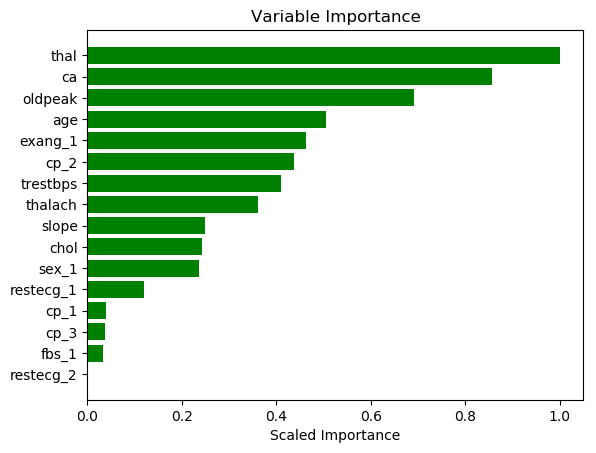

In [611]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = best_gbm._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = best_gbm._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

### Re-create GBM Model using only predictors with high variable importance  

In [612]:
predictors2 = df.drop(['target_1','restecg_2','cp_3','fbs_1','cp_1','restecg_1','sex_1','exang_1','slope','chol'], axis = 1).columns
# del predictors[-1]
print(predictors2)

['age', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal', 'cp_2']


In [613]:
train, valid, test = df.split_frame(
    ratios=[0.6,0.2], 
    seed=101, 
    destination_frames=['train.hex','valid.hex','test.hex']
)

In [615]:
# Train and validate a cartesian grid of GBMs
gbm_grid3 = H2OGridSearch(model = gbm_grid,
                          grid_id = 'gbm_grid3',
                          hyper_params = gbm_params1)

gbm_grid3.train(x=predictors2
                , y=response
                , training_frame=train
                , validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [616]:
# Get the grid results, sorted by validation AUC
gbm_gridperf3 = gbm_grid3.get_grid(sort_by='auc', decreasing=True)

In [617]:
best_gbm3 = gbm_gridperf3.models[0]

In [618]:
best_gbm_perf3 = best_gbm3.model_performance(test)
print(best_gbm_perf3)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.17698539188577925
RMSE: 0.42069631788949524
LogLoss: 0.5668920349945668
Mean Per-Class Error: 0.20123106060606055
AUC: 0.8513257575757576
AUCPR: 0.8256048220590629
Gini: 0.7026515151515151

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2640301438148829: 


,,0,1,Error,Rate
0,0,23.0,9.0,0.2812,(9.0/32.0)
1,1,4.0,29.0,0.1212,(4.0/33.0)
2,Total,27.0,38.0,0.2,(13.0/65.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.264030,0.816901,37.0
1,max f2,0.020474,0.882353,54.0
2,max f0point5,0.827238,0.840000,22.0
3,max accuracy,0.264030,0.800000,37.0
4,max precision,0.999389,1.000000,0.0
5,max recall,0.020474,1.000000,54.0
6,max specificity,0.999389,1.000000,0.0
7,max absolute_mcc,0.264030,0.606211,37.0
8,max min_per_class_accuracy,0.514883,0.750000,32.0
9,max mean_per_class_accuracy,0.264030,0.798769,37.0



Gains/Lift Table: Avg response rate: 50.77 %, avg score: 50.31 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015385,0.999324,1.969697,1.969697,1.000000,0.999389,1.000000,0.999389,0.030303,0.030303,96.969697,96.969697
1,,2,0.030769,0.999282,1.969697,1.969697,1.000000,0.999287,1.000000,0.999338,0.030303,0.060606,96.969697,96.969697
2,,3,0.030769,0.999268,0.000000,1.969697,0.000000,0.000000,1.000000,0.999338,0.000000,0.060606,-100.000000,96.969697
3,,4,0.046154,0.999192,1.969697,1.969697,1.000000,0.999267,1.000000,0.999314,0.030303,0.090909,96.969697,96.969697
4,,5,0.061538,0.999065,1.969697,1.969697,1.000000,0.999133,1.000000,0.999269,0.030303,0.121212,96.969697,96.969697
5,,6,0.107692,0.997129,1.969697,1.969697,1.000000,0.998005,1.000000,0.998727,0.090909,0.212121,96.969697,96.969697
6,,7,0.153846,0.990966,1.313131,1.772727,0.666667,0.995119,0.900000,0.997645,0.060606,0.272727,31.313131,77.272727
7,,8,0.200000,0.956878,1.969697,1.818182,1.000000,0.984979,0.923077,0.994722,0.090909,0.363636,96.969697,81.818182
8,,9,0.307692,0.905508,1.688312,1.772727,0.857143,0.933019,0.900000,0.973126,0.181818,0.545455,68.831169,77.272727
9,,10,0.400000,0.732209,0.984848,1.590909,0.500000,0.814661,0.807692,0.936557,0.090909,0.636364,-1.515152,59.090909


In [619]:
gs_rd_gbm_recall = round(27/33 , 2)
gs_rd_gbm_precision = round(27/32, 2)
gs_rd_gbm_f1 = 2*((gs_rd_gbm_precision * gs_rd_gbm_recall)/(gs_rd_gbm_precision + gs_rd_gbm_recall))

print(gs_rd_gbm_precision)
print(gs_rd_gbm_recall)
print(gs_rd_gbm_f1)


0.84
0.82
0.8298795180722892


### Recreate GBM using cross-validation

In [620]:
predictors = df.drop(['target_1'], axis = 1).columns
# del predictors[-1]
print(predictors)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'sex_1', 'fbs_1', 'exang_1', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2']


In [621]:
train, test = df.split_frame(
    ratios=[0.7], 
    seed=101, 
    destination_frames=['train.hex','test.hex']
)

In [622]:
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : [3,5,7,9]}

#Build initial GBM Model
gbm_grid_cv = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 90% of rows per tree
        sample_rate = 0.9,
        ## sample 90% of columns per split
        col_sample_rate = 0.9,
        ## fix a random number generator seed for reproducibility
        seed = 101,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 10,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4,
        nfolds = 3)

#Build grid search with previously made GBM and hyper parameters
grid_cv = H2OGridSearch(model = gbm_grid_cv
                     ,hyper_params = hyper_params,
                         grid_id = 'depth_grid_cv',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid_cv.train(x=predictors, 
           y=response,
           training_frame = train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [623]:
sorted_grid_cv = grid_cv.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid_cv)

    max_depth              model_ids                 auc
0           3  depth_grid_cv_model_1  0.8757879124953653
1           9  depth_grid_cv_model_4  0.8747682610307749
2           7  depth_grid_cv_model_3  0.8729143492769744
3           5  depth_grid_cv_model_2  0.8706896551724137



In [624]:
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 7, 9], 
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.8, 0.9]
}


gbm_grid_cv = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 10,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4,
        distribution = "bernoulli",
        seed = 101,
        score_tree_interval = 10,
        nfolds = 3
        )

In [625]:
# Train and validate a cartesian grid of GBMs
gbm_grid_cv = H2OGridSearch(model = gbm_grid_cv,
                          grid_id = 'gbm_grid_cv',
                          hyper_params = gbm_params1)

gbm_grid_cv.train(x=predictors
                , y=response
                , training_frame=train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [626]:
# Get the grid results, sorted by validation AUC
gbm_grid_perf_cv = gbm_grid_cv.get_grid(sort_by='auc', decreasing=True)

In [627]:
best_gbm_cv = gbm_grid_perf_cv.models[0]

In [628]:
best_gbm_perf_cv = best_gbm_cv.model_performance(test)
print(best_gbm_perf_cv)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12619543219640103
RMSE: 0.3552399642444541
LogLoss: 0.4383037979951221
Mean Per-Class Error: 0.14829931972789112
AUC: 0.8938775510204081
AUCPR: 0.869705530772403
Gini: 0.7877551020408162

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3268838733995616: 


,,0,1,Error,Rate
0,0,35.0,10.0,0.2222,(10.0/45.0)
1,1,4.0,45.0,0.0816,(4.0/49.0)
2,Total,39.0,55.0,0.1489,(14.0/94.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326884,0.865385,54.0
1,max f2,0.136927,0.902256,69.0
2,max f0point5,0.629240,0.866667,43.0
3,max accuracy,0.466690,0.851064,46.0
4,max precision,0.997045,1.000000,0.0
5,max recall,0.010675,1.000000,85.0
6,max specificity,0.997045,1.000000,0.0
7,max absolute_mcc,0.326884,0.705814,54.0
8,max min_per_class_accuracy,0.466690,0.836735,46.0
9,max mean_per_class_accuracy,0.466690,0.851701,46.0



Gains/Lift Table: Avg response rate: 52.13 %, avg score: 51.72 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010638,0.994593,1.918367,1.918367,1.000000,0.997045,1.000000,0.997045,0.020408,0.020408,91.836735,91.836735
1,,2,0.021277,0.993183,1.918367,1.918367,1.000000,0.994408,1.000000,0.995726,0.020408,0.040816,91.836735,91.836735
2,,3,0.031915,0.992568,1.918367,1.918367,1.000000,0.992984,1.000000,0.994812,0.020408,0.061224,91.836735,91.836735
3,,4,0.042553,0.991879,1.918367,1.918367,1.000000,0.992458,1.000000,0.994224,0.020408,0.081633,91.836735,91.836735
4,,5,0.053191,0.991229,1.918367,1.918367,1.000000,0.991654,1.000000,0.993710,0.020408,0.102041,91.836735,91.836735
5,,6,0.106383,0.985668,1.918367,1.918367,1.000000,0.989385,1.000000,0.991547,0.102041,0.204082,91.836735,91.836735
6,,7,0.148936,0.980869,1.438776,1.781341,0.750000,0.984545,0.928571,0.989547,0.061224,0.265306,43.877551,78.134111
7,,8,0.202128,0.958484,1.534694,1.716434,0.800000,0.972641,0.894737,0.985098,0.081633,0.346939,53.469388,71.643394
8,,9,0.297872,0.892586,1.492063,1.644315,0.777778,0.941503,0.857143,0.971085,0.142857,0.489796,49.206349,64.431487
9,,10,0.404255,0.766913,1.918367,1.716434,1.000000,0.829123,0.894737,0.933727,0.204082,0.693878,91.836735,71.643394


In [647]:
cv_gbm_recall = round(45/49 , 2)
cv_gbm_precision = round(45/55, 2)
cv_gbm_f1 = 2*((cv_gbm_precision * cv_gbm_recall)/(cv_gbm_precision + cv_gbm_recall))

print(cv_gbm_precision)
print(cv_gbm_recall)
print(cv_gbm_f1)

0.82
0.92
0.8671264367816092


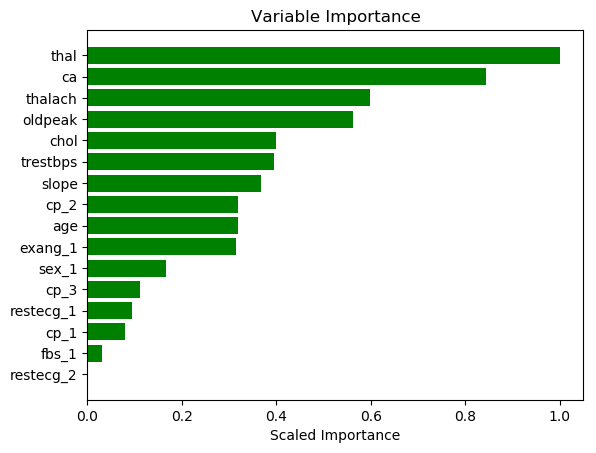

In [629]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = best_gbm_cv._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = best_gbm_cv._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [630]:
best_gbm_cv._model_json['output']['variable_importances']


Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,thal,56.045208,1.000000,0.178495
1,ca,47.323048,0.844373,0.150716
2,thalach,33.569996,0.598981,0.106915
3,oldpeak,31.558182,0.563084,0.100508
4,chol,22.408554,0.399830,0.071368
5,trestbps,22.159781,0.395391,0.070575
6,slope,20.588825,0.367361,0.065572
7,cp_2,17.910570,0.319574,0.057042
8,age,17.843971,0.318385,0.056830
9,exang_1,17.608673,0.314187,0.056081


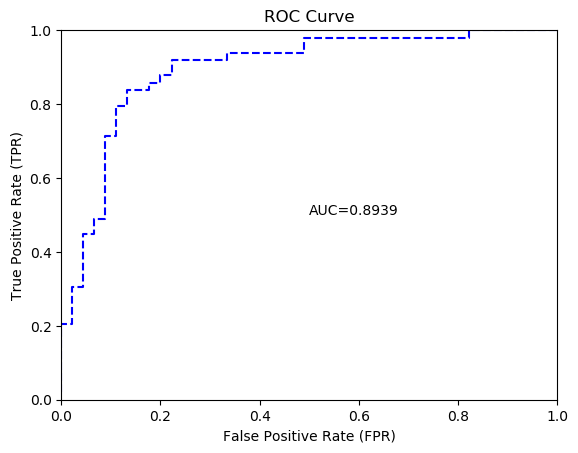

In [650]:
best_gbm_perf_cv.plot(type="roc")

### Recreate GBM model using cross validation and reduced set of predictor variables

In [632]:
predictors_cv2 = df.drop(['target_1','restecg_2','fbs_1','cp_1','restecg_1','cp_3','sex_1'], axis = 1).columns
# del predictors[-1]
print(predictors_cv2)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'exang_1', 'cp_2']


In [633]:
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 7, 9], # range(new_min, new_max),# 
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.8, 0.9]
}


gbm_grid_cv = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 10,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4,
        distribution = "bernoulli",
        seed = 101,
        score_tree_interval = 10,
        nfolds = 3
        )

In [634]:
# Train and validate a cartesian grid of GBMs
gbm_grid_cv2 = H2OGridSearch(model = gbm_grid_cv,
                          grid_id = 'gbm_grid_cv2',
                          hyper_params = gbm_params1)

gbm_grid_cv2.train(x=predictors_cv2
                , y=response
                , training_frame=train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [636]:
# Get the grid results, sorted by validation AUC
gbm_grid_perf_cv2 = gbm_grid_cv2.get_grid(sort_by='auc', decreasing=True)

In [637]:
best_gbm_cv2 = gbm_grid_perf_cv2.models[0]

In [638]:
best_gbm_perf_cv2 = best_gbm_cv2.model_performance(test)
print(best_gbm_perf_cv2)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1525771146710466
RMSE: 0.39061120653540726
LogLoss: 0.4821830817297541
Mean Per-Class Error: 0.17800453514739234
AUC: 0.8920634920634921
AUCPR: 0.8727399564779829
Gini: 0.7841269841269842

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39443520167906054: 


,,0,1,Error,Rate
0,0,29.0,16.0,0.3556,(16.0/45.0)
1,1,1.0,48.0,0.0204,(1.0/49.0)
2,Total,30.0,64.0,0.1809,(17.0/94.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.394435,0.849558,63.0
1,max f2,0.394435,0.923077,63.0
2,max f0point5,0.583227,0.853659,38.0
3,max accuracy,0.559556,0.819149,41.0
4,max precision,0.821437,1.000000,0.0
5,max recall,0.304724,1.000000,77.0
6,max specificity,0.821437,1.000000,0.0
7,max absolute_mcc,0.394435,0.668750,63.0
8,max min_per_class_accuracy,0.519689,0.777778,48.0
9,max mean_per_class_accuracy,0.559556,0.821995,41.0



Gains/Lift Table: Avg response rate: 52.13 %, avg score: 53.03 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010638,0.821150,1.918367,1.918367,1.000000,0.821437,1.000000,0.821437,0.020408,0.020408,91.836735,91.836735
1,,2,0.021277,0.819103,1.918367,1.918367,1.000000,0.821128,1.000000,0.821283,0.020408,0.040816,91.836735,91.836735
2,,3,0.031915,0.817702,1.918367,1.918367,1.000000,0.818774,1.000000,0.820446,0.020408,0.061224,91.836735,91.836735
3,,4,0.042553,0.816795,1.918367,1.918367,1.000000,0.817417,1.000000,0.819689,0.020408,0.081633,91.836735,91.836735
4,,5,0.053191,0.815750,1.918367,1.918367,1.000000,0.816553,1.000000,0.819062,0.020408,0.102041,91.836735,91.836735
5,,6,0.106383,0.803131,1.918367,1.918367,1.000000,0.812150,1.000000,0.815606,0.102041,0.204082,91.836735,91.836735
6,,7,0.148936,0.775477,1.438776,1.781341,0.750000,0.787795,0.928571,0.807660,0.061224,0.265306,43.877551,78.134111
7,,8,0.202128,0.767088,1.534694,1.716434,0.800000,0.770431,0.894737,0.797863,0.081633,0.346939,53.469388,71.643394
8,,9,0.297872,0.695502,1.705215,1.712828,0.888889,0.735571,0.892857,0.777840,0.163265,0.510204,70.521542,71.282799
9,,10,0.404255,0.595391,1.726531,1.716434,0.900000,0.640185,0.894737,0.741615,0.183673,0.693878,72.653061,71.643394


In [640]:
cv_rd_gbm_recall = round(48/49 , 2)
cv_rd_gbm_precision = round(48/64, 2)
cv_rd_gbm_f1 = 2*((cv_rd_gbm_precision * cv_rd_gbm_recall)/(cv_rd_gbm_precision + cv_rd_gbm_recall))

print(cv_rd_gbm_precision)
print(cv_rd_gbm_recall)
print(cv_rd_gbm_f1)

0.75
0.98
0.8497109826589595


## Identify best performing GBM model

Train, Validation, Test split with full set of predictor fields

In [641]:
print(gs_gbm_precision)
print(gs_gbm_recall)
print(gs_gbm_f1)

0.84
0.82
0.8298795180722892


Train, Validation, Test split with reduced set of predictor fields

In [642]:
print(gs_rd_gbm_precision)
print(gs_rd_gbm_recall)
print(gs_rd_gbm_f1)

0.84
0.82
0.8298795180722892


Cross validation with all predictor fields

In [643]:
print(cv_gbm_precision)
print(cv_gbm_recall)
print(cv_gbm_f1)

0.82
0.9
0.858139534883721


Cross validation with reduced set of predictor fields

In [644]:
print(cv_rd_gbm_precision)
print(cv_rd_gbm_recall)
print(cv_rd_gbm_f1)

0.75
0.98
0.8497109826589595


# Model Performance Comparison
When reviewing the performance of our best Logit and GBM models (with respect to F1 score) we find that our Logit model slightly outperforms our GBM model with respect to precision. However, our GBM model outperforms our Logit model with respect to Recall.

Since in this example the cost of false negatives outweigh the cost of false positives, we would want to use the GBM model as identifies the greatest percentage of total heart disease patients while only slightly underperforming with respect to precision.

Top performing Logistic Regression Model

In [646]:
precision_recall_fscore_support(y_test, y_pred_logreg_sfm, average="binary")

(0.84, 0.8936170212765957, 0.8659793814432989, None)

Top performing GBM model 

In [648]:
print(cv_gbm_precision)
print(cv_gbm_recall)
print(cv_gbm_f1)

0.82
0.92
0.8671264367816092


In [651]:
h2o.shutdown(prompt=False)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_a1df closed.


In [652]:
my_vars = []
for var in dir():
    if not var.startswith('_'):
        my_vars.append(var)
        
for x in my_vars:
    del globals()[x]